In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import seaborn
import powerlaw
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from scipy.stats import norm

import matplotlib as mpl
from scipy.stats import kstest

In [2]:
import powerlaw

# APS

In [3]:
path1 = r'E:\netData\APS\3 properties\nodepro2010.zip'

In [4]:
df = pd.read_csv(path1)

In [22]:
D = df['D'].to_numpy()
D = D[D > 0]
D = D[D < 1]

D2 = df['2stepD'].to_numpy()
D2 = D2[D2>0]
D2 = D2[D2<1]

CD = df['CD'].to_numpy()
CD = CD[CD<1]

degree = df['degree'].to_numpy()
degree = degree[degree > 0]

h = df['h'].to_numpy()
h = h[h > 0]

pg = df['h'].to_numpy()
pg = pg[pg > 0]

In [23]:
fit1 = powerlaw.Fit(D)
fit2 = powerlaw.Fit(D2)
fit3 = powerlaw.Fit(CD)
fit4 = powerlaw.Fit(degree)
fit5 = powerlaw.Fit(h)
fit6 = powerlaw.Fit(pg)

Calculating best minimal value for power law fit


In [26]:
D2

array([0.03773585, 0.25      , 0.33333333, ..., 0.03945372, 0.01369863,
       0.01097818])

In [31]:
df = df[df['D']<1][df['D']>0]

C:\Users\nd\AppData\Local\Temp\ipykernel_24076\2263059929.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['D']<1][df['D']>0]


In [35]:
dlst = [ 'D' , '2stepD' , 'CD','degree' , 'h' , 'pagerank' ]
fitlst = [fit1, fit2,fit3,fit4,fit5,fit6]

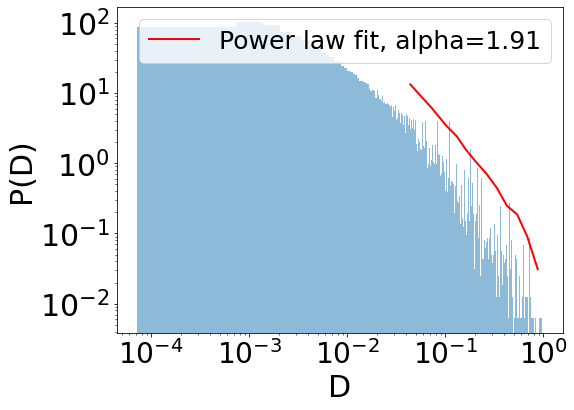

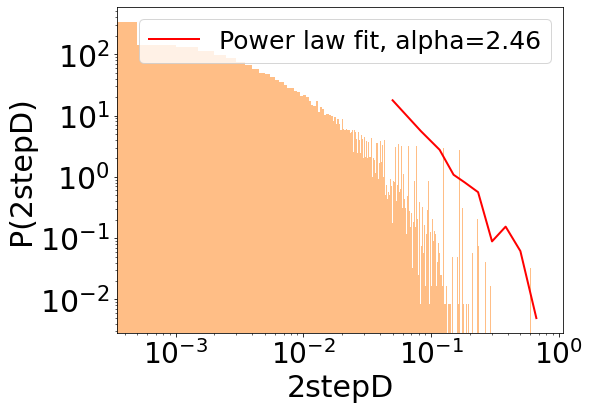

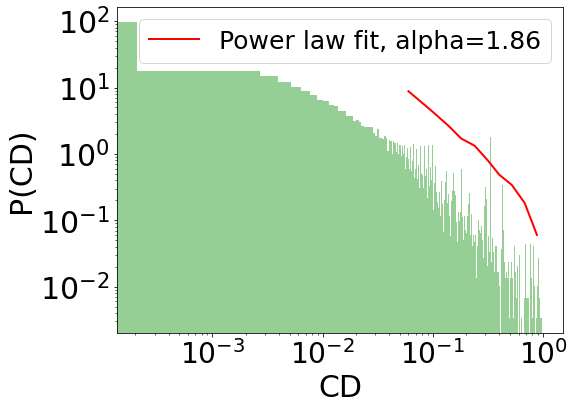

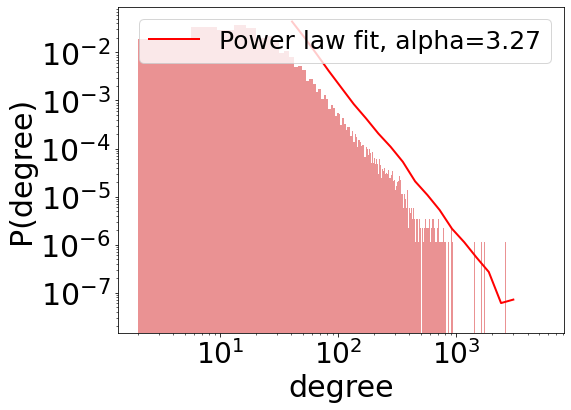

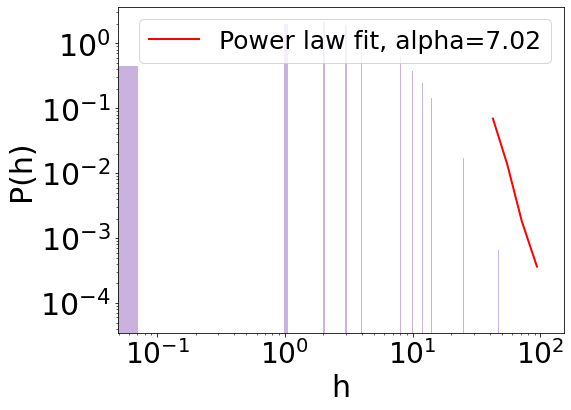

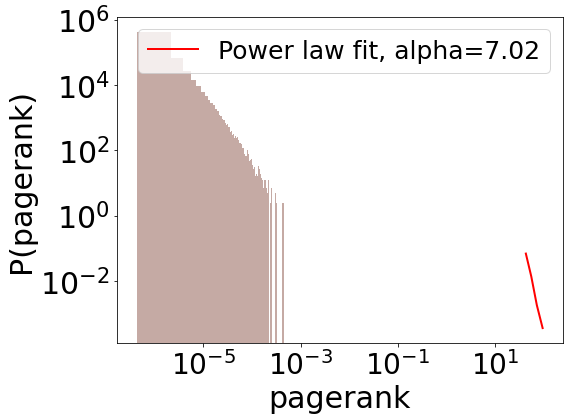

In [40]:
# plt.subplots(2,3,figsize=(24,14))
# plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.15,hspace=0.3)
c = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i in range(6):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.hist(df[dlst[i]], bins=1500,  density=True, alpha=0.5, color=c[i])
    fitlst[i].plot_pdf(color='red', ax=ax, linewidth=2, label=f'Power law fit, alpha={fitlst[i].alpha:.2f}')
    ax.legend()
    ax.set_xlabel(dlst[i] , fontsize=30)
    ax.set_ylabel('P({})'.format(dlst[i]) , fontsize=30)
    plt.xticks( fontsize=28)
    plt.yticks(fontsize=30)
    plt.legend(fontsize = 25 )

    plt.savefig(r"F:\A J YANG PAPER\Disruption index\JOI DI in complex networks\fig\fig6\{}.png".format(i),bbox_inches = 'tight')

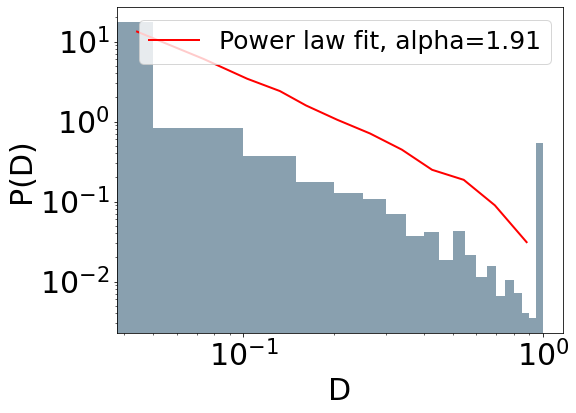

In [34]:
# plot histogram with power law fit
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(df['D'], bins=20,  density=True, alpha=0.5, color='#154360')
fit.plot_pdf(color='red', ax=ax, linewidth=2, label=f'Power law fit, alpha={fit.alpha:.2f}')
ax.legend()
ax.set_xlabel('D' , fontsize=30)
ax.set_ylabel(r'P(D)' , fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize = 25 )
plt.show()

In [16]:
ff = df[['DIO', '2stepDIO','degree', 'out-degree','in-degree', 'coreness','h-index','pagerank']]
ff = ff[ff['in-degree']>1]
ff = ff[['DIO','2stepDIO','degree', 'coreness','h-index','pagerank']]

# log-log distributions

In [117]:
g = sns.displot(data = df,x = 'degree',color='#186A3B')
plt.yscale ("log")
plt.xscale ("log")
plt.xlim((1e0, 1e3))
plt.ylim((1e0, 1e3))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("")
plt.ylabel("")
g.figure.dpi = 200

In [119]:
g = sns.displot(data = df,x = 'coreness',color='#186A3B')
plt.yscale ("log")
plt.xscale ("log")
plt.xlim((1e0, 1e2))
plt.ylim((1e0, 1e3))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("")
plt.ylabel("")
g.figure.dpi = 200

In [121]:
g = sns.displot(data = df,x = 'h-index',color='#186A3B')
plt.yscale ("log")
plt.xscale ("log")
plt.xlim((1e0, 1e2))
plt.ylim((1e0, 1e3))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("")
plt.ylabel("")
g.figure.dpi = 200

In [123]:
g = sns.displot(data = df,x = 'pagerank',color='#186A3B')
plt.yscale ("log")
plt.xscale ("log")
plt.xlim((1e-4, 1e-2))
plt.ylim((1e0, 1e3))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("")
plt.ylabel("")
g.figure.dpi = 200

In [127]:
g = sns.displot(data = ff,x = 'DIO',color='#186A3B')
plt.yscale ("log")
plt.xscale ("log")
plt.xlim((1e-2, 1e0))
plt.ylim((1e0, 1e3))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("")
plt.ylabel("")
g.figure.dpi = 200

In [132]:
g = sns.displot(data = ff,x = '2stepDIO',color='#186A3B')
plt.yscale ("log")
plt.xscale ("log")
plt.xlim((1e-3, 1e0))
plt.ylim((1e0, 1e3))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("")
plt.ylabel("")
g.figure.dpi = 200

In [50]:
# data = df['degree'].values
# fit = powerlaw.Fit(data)
# fit.distribution_compare('power_law', 'exponential')
# fit.plot_cdf(color = 'b')

(9.765377838821998, 0.10173554491028533)